In [1]:
import tushare as ts
import time
import datetime
import sys
import os
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
sys.path.append('../Codes')
import DataProcessor as DP
from DataProcessor import centralize
from DataProcessor import standardize
from DataProcessor import standardize_industry
from DataProcessor import get_industrys
from DataProcessor import get_stock_money_data

In [2]:
#行业轮动

In [3]:
#获取行业分类
industrys = DP.get_industrys('L2')

In [54]:
#industrys
industry = ['801081.SI',
            '801222.SI',
            '801741.SI', 
            '801742.SI', 
            '801743.SI', 
            '801744.SI',
            '801752.SI',
            '801124.SI',
            '801153.SI',
            '801178.SI',
            
           ]
#industry='all'
#取行业内股票数据
data = DP.get_index_daily_data(industrys=industrys, industry=industry,
                         fields=['open',
                                 'high',
                                 'low',
                                 'close',
                                 'adj_factor',
                                 'turnover_rate_f',
                                 'pe_ttm',
                                 'pb',
                                 'ps_ttm',
                                 'total_mv'])

#money_dic = get_stock_money_data(industry)

In [55]:
#因子构造
OPEN = np.log(data['open'])
HIGH = np.log(data['high'])
LOW = np.log(data['low'])
CLOSE = np.log(data['close'])

trf = data['turnover_rate_f']
ltrf = np.log(trf)

mv = data['total_mv']
lmv = np.log(mv)


In [56]:
ror = CLOSE - CLOSE.shift()
r_rinei = CLOSE - OPEN
r_geye = OPEN - CLOSE.shift()
rh = HIGH - OPEN
rl = LOW - OPEN
hl = rh - rl
vr = ltrf - ltrf.shift()

In [57]:
n = 2
y = standardize(ror.rolling(n).sum().shift(-n+1) - r_geye)
y[(r_geye > 0.09).fillna(False) & (r_rinei.abs() < 1e-6).fillna(False)] = 0

In [58]:
x1 = standardize(r_rinei)
x2 = standardize(r_rinei).rolling(1).mean().shift(1)
x3 = standardize(r_rinei).rolling(1).mean().shift(2)
x4 = standardize(r_rinei).rolling(2).mean().shift(3)
x5 = standardize(r_rinei).rolling(5).mean().shift(5)
x6 = standardize(r_rinei).rolling(5).mean().shift(10)
x7 = standardize(r_rinei).rolling(5).mean().shift(15)

z1 = standardize(r_geye)
z2 = standardize(r_geye).rolling(1).mean().shift(1)
z3 = standardize(r_geye).rolling(1).mean().shift(2)
z4 = standardize(r_geye).rolling(2).mean().shift(3)
z5 = standardize(r_geye).rolling(5).mean().shift(5)
z6 = standardize(r_geye).rolling(5).mean().shift(10)
z7 = standardize(r_geye).rolling(5).mean().shift(15)

u1 = standardize(ror)
u2 = standardize(ror).rolling(1).mean().shift(1)
u3 = standardize(ror).rolling(1).mean().shift(2)
u4 = standardize(ror).rolling(2).mean().shift(3)
u5 = standardize(ror).rolling(5).mean().shift(5)
u6 = standardize(ror).rolling(5).mean().shift(10)
u7 = standardize(ror).rolling(5).mean().shift(15)

h1 = standardize(rh)
h2 = standardize(rh).rolling(1).mean().shift(1)
h3 = standardize(rh).rolling(1).mean().shift(2)
h4 = standardize(rh).rolling(2).mean().shift(3)
h5 = standardize(rh).rolling(5).mean().shift(5)
h6 = standardize(rh).rolling(5).mean().shift(10)
h7 = standardize(rh).rolling(5).mean().shift(15)

l1 = standardize(rl)
l2 = standardize(rl).rolling(1).mean().shift(1)
l3 = standardize(rl).rolling(1).mean().shift(2)
l4 = standardize(rl).rolling(2).mean().shift(3)
l5 = standardize(rl).rolling(5).mean().shift(5)
l6 = standardize(rl).rolling(5).mean().shift(10)
l7 = standardize(rl).rolling(5).mean().shift(15)

hl1 = standardize(hl)
hl2 = standardize(hl).rolling(1).mean().shift(1)
hl3 = standardize(hl).rolling(1).mean().shift(2)
hl4 = standardize(hl).rolling(2).mean().shift(3)
hl5 = standardize(hl).rolling(5).mean().shift(5)
hl6 = standardize(hl).rolling(5).mean().shift(10)
hl7 = standardize(hl).rolling(5).mean().shift(15)

vr1 = standardize(vr)
vr2 = standardize(vr).rolling(1).mean().shift(1)
vr3 = standardize(vr).rolling(1).mean().shift(2)
vr4 = standardize(vr).rolling(2).mean().shift(3)
vr5 = standardize(vr).rolling(5).mean().shift(5)
vr6 = standardize(vr).rolling(5).mean().shift(10)
vr7 = standardize(vr).rolling(5).mean().shift(15)

lmv = standardize(lmv)


In [59]:
factor = {
    'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'x5':x5, 'x6':x6, 'x7':x7,
    'z1':z1, 'z2':z2, 'z3':z3, 'z4':z4, 'z5':z5, 'z6':z6, 'z7':z7,
    'u1':u1, 'u2':u2, 'u3':u3, 'u4':u4, 'u5':u5, 'u6':u6, 'u7':u7,
    'h1':h1, 'h2':h2, 'h3':h3, 'h4':h4, 'h5':h5, 'h6':h6, 'h7':h7,
    'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5, 'l6':l6, 'l7':l7,
    'hl1':hl1, 'hl2':hl2, 'hl3':hl3, 'hl4':hl4, 'hl5':hl5, 'hl6':hl6, 'hl7':hl7,
    'vr1':vr1, 'vr2':vr2, 'vr3':vr3, 'vr4':vr4, 'vr5':vr5, 'vr6':vr6, 'vr7':vr7,
    'lmv':lmv,
    #'rzrq':rzrq, 'gt':gt,
}

In [127]:
begin_date = '2005-01-01'
split_date = '2010-01-01'
train_date = y.index[(begin_date < y.index) & (y.index < split_date)]
test_date = y.index[y.index > split_date]

In [128]:
df_y_train = DataFrame({'y':y.loc[train_date, :].values.flatten()})
df_x_train = DataFrame({k:factor[k].loc[train_date, :].shift().values.flatten() for k in factor.keys()})
df_y_test = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test = DataFrame({k:factor[k].loc[test_date, :].shift().values.flatten() for k in factor.keys()})
df_train = pd.concat([df_y_train, df_x_train], axis=1)
df_test = pd.concat([df_y_test, df_x_test], axis=1)

In [129]:
#df_train.corr().iloc[0,:].sort_values()

In [136]:
model = smf.ols('y~\
                  \
                  +x1+x2+x3+x4+x5+x6+x7\
                  +z1+z2+z3+z4+z5+z6+z7\
                  \
                  \
                  \
                  ', data=df_train).fit()
model.tvalues

Intercept    2.273732e-16
x1          -4.513839e-01
x2          -2.258868e+00
x3           1.186500e+00
x4          -1.931127e+00
x5           2.552484e+00
x6           3.182310e+00
x7           7.060775e-01
z1          -4.582147e+00
z2          -4.243647e+00
z3          -1.354302e+00
z4          -5.946944e+00
z5          -2.483285e+00
z6           1.357207e+00
z7          -2.724286e+00
dtype: float64

801081.SI    0.322640
801752.SI    0.120514
801744.SI    0.032333
801741.SI    0.029985
801742.SI   -0.004257
801222.SI   -0.050251
801743.SI   -0.053031
801124.SI   -0.087196
801178.SI   -0.122378
801153.SI   -0.188358
Name: 2020-07-17 00:00:00, dtype: float64


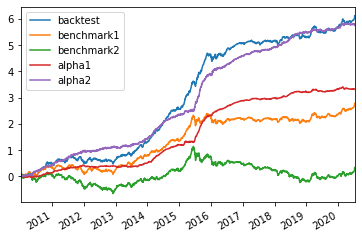

In [137]:
#调仓周期
m = 2
y_hat = DataFrame(model.predict(df_test).values.reshape(len(test_date), len(y.columns)), index=test_date, columns=y.columns)
q = 1 - 3 / len(y_hat.columns)
position = (y_hat.gt(y_hat.quantile(q, 1), 0))

ror_test = ror.loc[test_date, :]
r_rinei_test = r_rinei.loc[test_date, :]
r_geye_test = r_geye.loc[test_date, :]

ror_huice = position * (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
ror_huice[ror_huice==0] = np.nan
ror_huice.mean(1).cumsum().plot()

benchmark1 = (ror_test.rolling(m).sum().shift(-m+1) - r_geye_test) / m
benchmark1.mean(1).cumsum().plot()
benchmark2 = ror_test
benchmark2.mean(1).cumsum().plot()

alpha1 = ror_huice.mean(1).cumsum() - benchmark1.mean(1).cumsum()
alpha2 = ror_huice.mean(1).cumsum() - benchmark2.mean(1).cumsum()
alpha1.plot()
alpha2.plot()
#for i in industry:
#    stock = industrys[i]
#    ror_test.loc[:,stock].mean(1).cumsum().plot()
plt.legend(['backtest', 'benchmark1', 'benchmark2', 'alpha1', 'alpha2'] + [i for i in industry])
print(y_hat.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

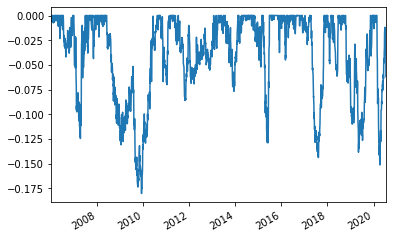

In [126]:
(alpha1 - alpha1.expanding().max()).plot()

In [21]:
position.sum(1)

2012-01-04    0
2012-01-05    2
2012-01-06    2
2012-01-09    2
2012-01-10    2
             ..
2020-07-13    2
2020-07-14    2
2020-07-15    2
2020-07-16    2
2020-07-17    2
Length: 2075, dtype: int64

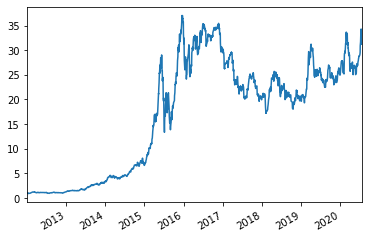

In [30]:
(ror_huice.mean(1)-0.0008+1).cumprod().plot()

In [1382]:
df_y_test2 = DataFrame({'y':y.loc[test_date, :].values.flatten()})
df_x_test2 = DataFrame({k:factor[k].loc[test_date, :].values.flatten() for k in factor.keys()})
df_test2 = pd.concat([df_y_test2, df_x_test2], axis=1)
y_hat2 = DataFrame(model.predict(df_test2).values.reshape(len(ror_test), len(ror_test.columns)), index=ror_test.index, columns=ror_test.columns)
print(y_hat2.iloc[-1,:].sort_values(ascending=False).dropna().iloc[:10])

300209.SZ    0.192616
300803.SZ    0.154640
600855.SH    0.145568
300687.SZ    0.141097
300368.SZ    0.139459
300465.SZ    0.131158
300448.SZ    0.117734
300541.SZ    0.115167
300277.SZ    0.107636
300248.SZ    0.106496
Name: 2020-07-16 00:00:00, dtype: float64


In [465]:
df_train = df_train.dropna()
model = RandomForestRegressor(n_estimators=10).fit(df_train.iloc[:, 1:], df_train.iloc[:, 0])
model.feature_importances_

array([0.05159753, 0.05007378, 0.04443164, 0.04619165, 0.04480049,
       0.04128151, 0.04127881, 0.05454827, 0.05270984, 0.05264996,
       0.04963717, 0.05406033, 0.04655707, 0.04854932, 0.0502602 ,
       0.0494474 , 0.04531465, 0.04479211, 0.04590302, 0.0421521 ,
       0.04376315])